No preprocessing used
no scaling use
data are imbalance


In [1]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d safiullah007/leaf-disease



100% 2.01G/2.01G [00:22<00:00, 90.5MB/s]
100% 2.01G/2.01G [00:22<00:00, 95.8MB/s]


In [2]:
# unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/leaf-disease.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [1]:
def accuracy_curve():
  h = history
#plot the accuracy value
  plt.plot(h.history['accuracy'],label='train accuracy')
  plt.plot(h.history['val_accuracy'],label = 'validation accuracy')
  plt.legend()
  plt.show()

def loss_curve():
  #plot the loss value
    h = history
    plt.plot(h.history['loss'],label = 'train loss')
    plt.plot(h.history['val_loss'],label = 'validation loss')
    plt.legend()
    plt.show()

In [2]:
def performance_measure():

  # Make predictions on the test data
  y_pred = model.predict(x_test)

  # Convert one-hot encoded predictions back to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred_labels)
  print("Accuracy:", accuracy)

  # Calculate precision, recall, and F1-score for each class
  precision = precision_score(y_test, y_pred_labels, average='macro')
  recall = recall_score(y_test, y_pred_labels, average='macro')
  f1 = f1_score(y_test, y_pred_labels, average='macro')

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)

In [3]:
def confusion_matrices():
    # Assuming you have already trained your classification model and obtained predictions.
  # Replace 'model' and 'test_data' with your actual model and test data.

  # Make predictions on the test data
  y_pred = model.predict(x_test)

  # Convert one-hot encoded predictions back to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

  # Calculate the confusion matrix
  cm = confusion_matrix(y_test, y_pred_labels)

  # Display the confusion matrix as a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

In [4]:
def output_checking():
  accuracy_curve()
  loss_curve()
  performance_measure()
  confusion_matrices()

In [5]:
def normalize_image(image):
    image = image.astype(np.float32)
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    return image

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
def resizing_image(image_path,width,height):
  image = cv2.imread(image_path)
  resized_image = cv2.resize(image, (width, height))

  return resized_image


In [6]:
loaded_data = np.load('/content/drive/MyDrive/data store/data.npy')
loaded_labels = np.load('/content/drive/MyDrive/data store/labels.npy')

In [7]:
x = (loaded_data)
y = (loaded_labels)
print("type of x independent varible which contain images :",type(x))
print("type of y dependent variable which contain the image label (with mask/without mask)",type(y))

type of x independent varible which contain images : <class 'numpy.ndarray'>
type of y dependent variable which contain the image label (with mask/without mask) <class 'numpy.ndarray'>


In [ ]:
# Define classes and subclasses
classes = ['Cashew', 'Cassava', 'Maize', 'Tomato']
subclasses = {
    'Cashew': ['anthracnose', 'gumosis', 'healthy', 'leaf miner', 'red rust'],
    'Cassava': ['bacterial blight', 'brown spot', 'green mite', 'healthy', 'mosaic'],
    'Maize': ['fall armyworm', 'grasshoper', 'healthy', 'leaf beetle', 'leaf blight', 'leaf spot', 'streak virus'],
    'Tomato': ['healthy', 'leaf blight', 'leaf curl', 'septoria leaf spot', 'verticulium wilt']
}

data = []  # To store images as arrays
labels = []  # To store labels
progress_bar = tqdm(total=len(classes) * len(subclasses))
main_folder = '/content/CCMT Dataset/CCMT Dataset'

# Read images and assign labels
for class_name in classes:
    for subclass_name in subclasses[class_name]:
        folder_path = os.path.join(main_folder, class_name, subclass_name)
        for filename in os.listdir(folder_path):
           # if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(folder_path, filename)
                # image = Image.open(image_path)
                image = cv2.imread(image_path)
                if image is not None:
                  image = cv2.resize(image,(150,150))
                  image_array = np.array(image)
                  # image_array = normalize_image(image)
                  data.append(image_array)
                  labels.append(class_name + '_' + subclass_name)
                  progress_bar.update(1)
                else:
                  print(f"Skipping file: {image_path}")
progress_bar.close()

# Convert 'data' and 'labels' lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)


15175it [01:09, 308.02it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/healthy/healthy88_.jpg
Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/healthy/healthy18_.jpg


15331it [01:10, 254.82it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf beetle/leaf beetle207_.jpg


15475it [01:10, 215.99it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf beetle/leaf beetle798_.jpg
Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf beetle/leaf beetle573_.jpg


15631it [01:11, 209.90it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf beetle/leaf beetle208_.jpg
Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf beetle/leaf beetle326_.jpg


15741it [01:11, 216.34it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf beetle/leaf beetle690_.jpg
Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf beetle/leaf beetle90_.jpg


15916it [01:12, 260.61it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf beetle/leaf beetle458_.jpg


16033it [01:12, 341.69it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf beetle/leaf beetle691_.jpg


16182it [01:13, 352.44it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf beetle/leaf beetle910_.jpg
Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf blight/leaf blight746_.jpg


16285it [01:13, 321.19it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf blight/leaf blight453_.jpg


16480it [01:14, 314.50it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf blight/leaf blight830_.jpg
Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf blight/leaf blight37_.jpg


16576it [01:14, 305.25it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf blight/leaf blight98_.jpg


16805it [01:15, 313.83it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf blight/leaf blight590_.jpg
Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf blight/leaf blight667_.jpg


17066it [01:16, 318.06it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf blight/leaf blight913_.jpg


17229it [01:16, 318.44it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf spot/leaf spot353_.jpg


17360it [01:17, 321.46it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf spot/leaf spot958_.jpg


17564it [01:17, 320.47it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf spot/leaf spot882_.jpg
Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf spot/leaf spot724_.jpg


17666it [01:18, 324.72it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf spot/leaf spot425_.jpg


17938it [01:18, 325.71it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf spot/leaf spot187_.jpg


18072it [01:19, 324.56it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf spot/leaf spot272_.jpg
Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf spot/leaf spot497_.jpg


18239it [01:19, 322.91it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf spot/leaf spot64_.jpg


18373it [01:20, 329.20it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/leaf spot/leaf spot799_.jpg


18471it [01:20, 315.59it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/streak virus/streak virus119_.jpg


18690it [01:21, 307.92it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/streak virus/streak virus422_.jpg


18912it [01:22, 308.42it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/streak virus/streak virus998_.jpg


19130it [01:22, 234.98it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/streak virus/streak virus774_.jpg


19155it [01:23, 218.17it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/streak virus/streak virus627_.jpg


19301it [01:23, 187.53it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/streak virus/streak virus486_.jpg


19402it [01:24, 197.42it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Maize/streak virus/streak virus701_.jpg


19708it [01:25, 240.13it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Tomato/healthy/healthy443_.jpg


19805it [01:26, 294.32it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Tomato/healthy/healthy77_.jpg


19906it [01:26, 317.19it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Tomato/leaf blight/leaf blight558_.jpg


20195it [01:27, 263.73it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Tomato/leaf blight/leaf blight72_.jpg
Skipping file: /content/CCMT Dataset/CCMT Dataset/Tomato/leaf blight/leaf blight471_.jpg


20294it [01:27, 300.25it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Tomato/leaf blight/leaf blight1232_.jpg


20391it [01:28, 309.46it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Tomato/leaf blight/leaf blight998_.jpg


20724it [01:29, 319.71it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Tomato/leaf blight/leaf blight814_.jpg


20857it [01:29, 325.37it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Tomato/leaf blight/leaf blight645_.jpg


21286it [01:30, 322.68it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Tomato/leaf curl/leaf curl186_.jpg
Skipping file: /content/CCMT Dataset/CCMT Dataset/Tomato/leaf curl/leaf curl271_.jpg


21651it [01:31, 324.32it/s]

Skipping file: /content/CCMT Dataset/CCMT Dataset/Tomato/leaf curl/leaf curl43_.jpg
Skipping file: /content/CCMT Dataset/CCMT Dataset/Tomato/leaf curl/leaf curl354_.jpg


25170it [01:44, 241.43it/s]


In [ ]:
len(data)

25170

In [ ]:
len(labels)

25170

Text(0.5, 1.0, 'Cashew_anthracnose')

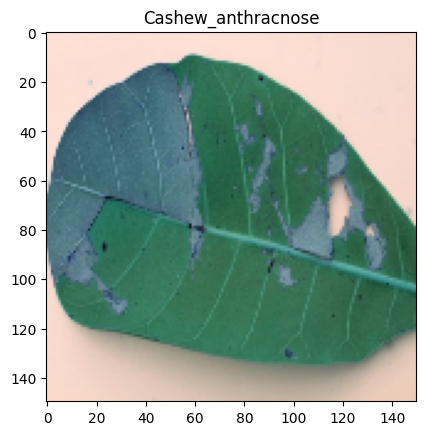

In [ ]:
plt.imshow(data[0])
plt.title(labels[0])

In [ ]:
print(labels)

['Cashew_anthracnose' 'Cashew_anthracnose' 'Cashew_anthracnose' ...
 'Tomato_verticulium wilt' 'Tomato_verticulium wilt'
 'Tomato_verticulium wilt']


In [8]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(loaded_labels)

In [ ]:
labels

array([ 0,  0,  0, ..., 21, 21, 21])

In [ ]:
# ----------------- NOt Necessary ---------------
# x = np.array(data)
# y = np.array(labels)
# print("type of x independent varible which contain images :",type(x))
# print("type of y dependent variable which contain the image label (with mask/without mask)",type(y))

type of x independent varible which contain images : <class 'numpy.ndarray'>
type of y dependent variable which contain the image label (with mask/without mask) <class 'numpy.ndarray'>


In [ ]:
x = (data)
y = (labels)
print("type of x independent varible which contain images :",type(x))
print("type of y dependent variable which contain the image label (with mask/without mask)",type(y))

type of x independent varible which contain images : <class 'numpy.ndarray'>
type of y dependent variable which contain the image label (with mask/without mask) <class 'numpy.ndarray'>


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state=2)

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encoded = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
layers.Conv2D(64, (3, 3), activation='relu')
model.add(MaxPooling2D(2,2))
layers.Conv2D(64, (3, 3), activation='relu')
model.add(MaxPooling2D(2,2))
layers.Conv2D(64, (3, 3), activation='relu')
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(64,activation = 'relu'))
model.add(Dense(22,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

history = model.fit(x_train,
                    y_train_encoded,
                    validation_split = 0.1,
                    epochs = 10)

Epoch 1/10
638/638 [==============================] - 24s 19ms/step - loss: 3.4829 - accuracy: 0.1632 - val_loss: 2.4817 - val_accuracy: 0.2348
Epoch 2/10
638/638 [==============================] - 12s 19ms/step - loss: 2.4009 - accuracy: 0.2556 - val_loss: 2.2213 - val_accuracy: 0.2895
Epoch 3/10
638/638 [==============================] - 11s 17ms/step - loss: 2.1655 - accuracy: 0.3084 - val_loss: 2.0614 - val_accuracy: 0.3438
Epoch 4/10
638/638 [==============================] - 11s 17ms/step - loss: 1.9498 - accuracy: 0.3706 - val_loss: 1.9010 - val_accuracy: 0.3989
Epoch 5/10
638/638 [==============================] - 11s 17ms/step - loss: 1.6913 - accuracy: 0.4361 - val_loss: 1.6412 - val_accuracy: 0.4665
Epoch 6/10
638/638 [==============================] - 10s 16ms/step - loss: 1.4694 - accuracy: 0.5001 - val_loss: 1.4692 - val_accuracy: 0.5265
Epoch 7/10
638/638 [==============================] - 10s 16ms/step - loss: 1.3121 - accuracy: 0.5503 - val_loss: 1.3571 - val_accuracy:

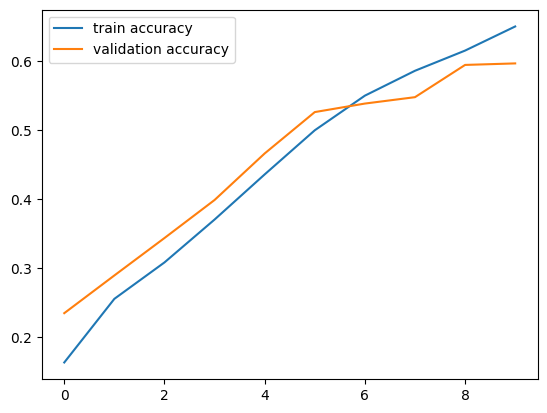

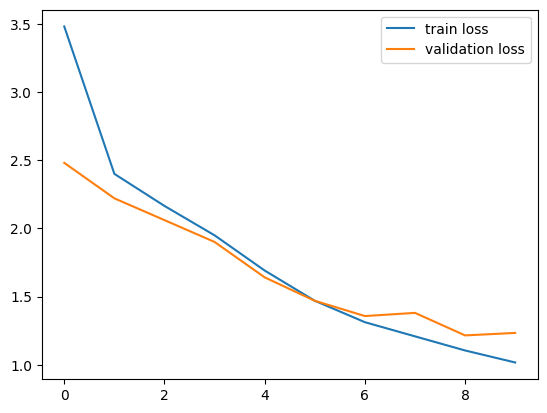

In [ ]:
accuracy_curve()
loss_curve()

In [ ]:
performance_measure()

79/79 [==============================] - 1s 6ms/step
Accuracy: 0.5987286452125546
Precision: 0.597387580939796
Recall: 0.5553194367811177
F1 Score: 0.5456480478587122


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test_encoded)

# Print the accuracy
print(f"Test accuracy: {accuracy * 100:.2f}%")

79/79 [==============================] - 1s 12ms/step - loss: 1.2169 - accuracy: 0.5987
Test accuracy: 59.87%


In [ ]:

confusion_matrices()

79/79 [==============================] - 1s 6ms/step


TypeError: ignored

79/79 [==============================] - 1s 8ms/step


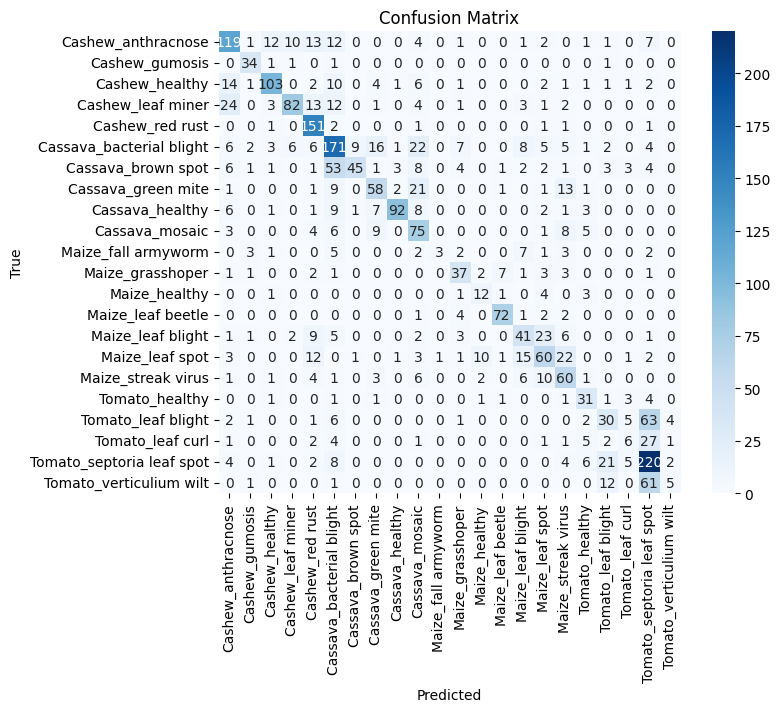

In [ ]:


# Assuming you have already trained your classification model and obtained predictions.
# Replace 'model' and 'test_data' with your actual model and test data.

# Make predictions on the test data
y_pred = model.predict(x_test)

# Convert one-hot encoded predictions back to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
file_path = '/content/drive/MyDrive/save model/CNN model_epoch10_acc59%_.h5'
model.save(file_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


VGG19
**bold text**

In [ ]:
from tensorflow.keras.applications import VGG19



# Load the VGG16 model with pre-trained weights
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Define classes and subclasses as before
# ...

# Load your data and labels
# ...


# # Preprocess the images to match VGG16 input requirements
# x_train_preprocessed = np.array([cv2.resize(image, (224, 224)) for image in x_train])
# x_val_preprocessed = np.array([cv2.resize(image, (224, 224)) for image in x_val])

# Preprocess labels
# y_train_categorical = to_categorical(y_train)
# y_val_categorical = to_categorical(y_val)

# Add classification layers on top of VGG16
flat_layer = Flatten()(vgg_model.output)
output_layer = Dense(22, activation='softmax')(flat_layer)

# Create a new model combining VGG16 and the classification layers
model = Model(inputs=vgg_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=10)

Epoch 1/10
638/638 [==============================] - 204s 266ms/step - loss: 2.8510 - accuracy: 0.1972 - val_loss: 2.3931 - val_accuracy: 0.2639
Epoch 2/10
638/638 [==============================] - 169s 264ms/step - loss: 2.2292 - accuracy: 0.3058 - val_loss: 2.1614 - val_accuracy: 0.3380
Epoch 3/10
638/638 [==============================] - 168s 264ms/step - loss: 2.0720 - accuracy: 0.3498 - val_loss: 2.0572 - val_accuracy: 0.3394
Epoch 4/10
638/638 [==============================] - 168s 263ms/step - loss: 1.9252 - accuracy: 0.3867 - val_loss: 1.8666 - val_accuracy: 0.3936
Epoch 5/10
638/638 [==============================] - 168s 263ms/step - loss: 1.7204 - accuracy: 0.4435 - val_loss: 1.6246 - val_accuracy: 0.4678
Epoch 6/10
638/638 [==============================] - 167s 262ms/step - loss: 1.5746 - accuracy: 0.4788 - val_loss: 1.6332 - val_accuracy: 0.4775
Epoch 7/10
638/638 [==============================] - 167s 262ms/step - loss: 1.4766 - accuracy: 0.5075 - val_loss: 1.5430 -

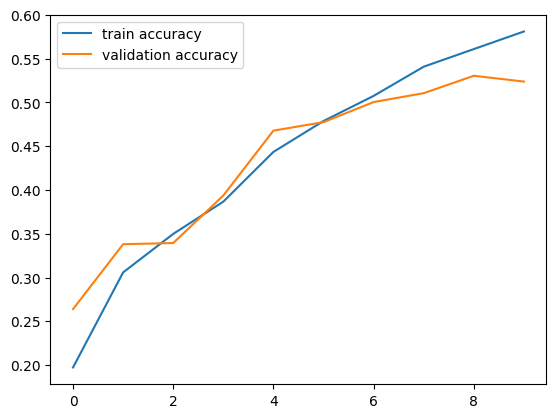

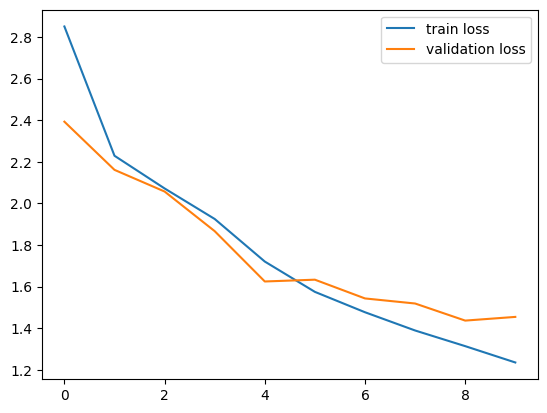

In [ ]:
accuracy_curve()
loss_curve()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test_encoded)

# Print the accuracy
print(f"Test accuracy: {accuracy * 100:.2f}%")

65/65 [==============================] - 7s 102ms/step - loss: 0.5133 - accuracy: 0.8387
Test accuracy: 83.87%


In [ ]:
performance_measure()

65/65 [==============================] - 5s 79ms/step


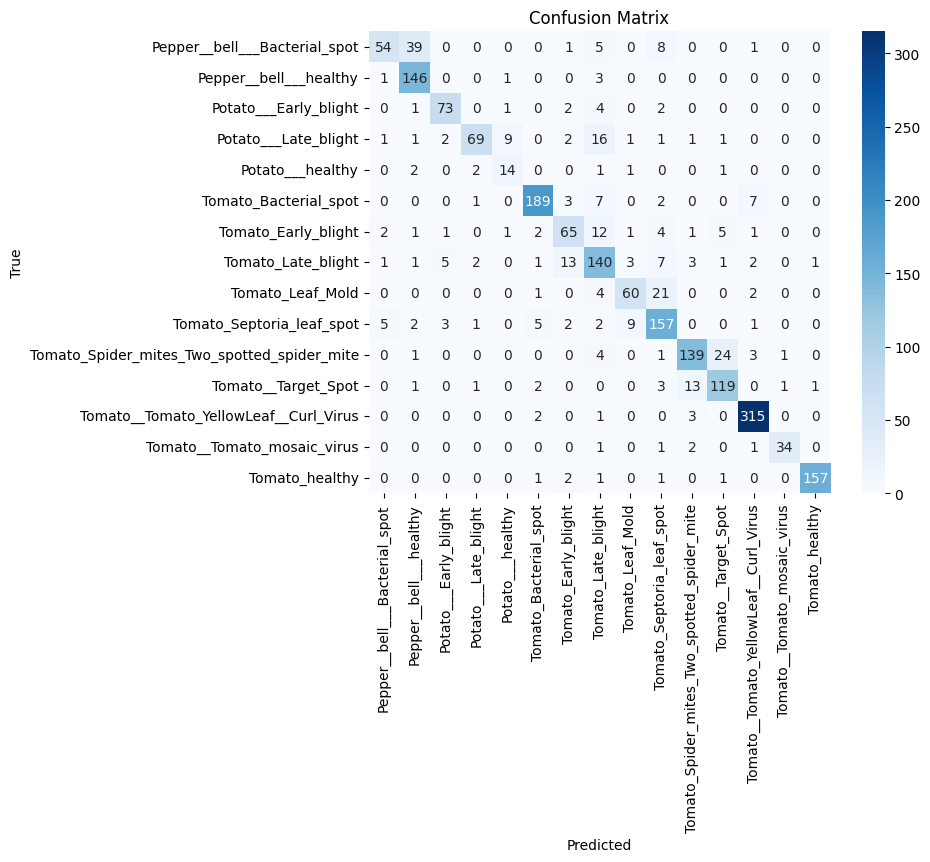

In [ ]:


# Assuming you have already trained your classification model and obtained predictions.
# Replace 'model' and 'test_data' with your actual model and test data.

# Make predictions on the test data
y_pred = model.predict(x_test)

# Convert one-hot encoded predictions back to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
file_path = '/content/drive/MyDrive/Deep learning model/Plant village/VGG16 model_epoch10_acc83%_.h5'
model.save(file_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Resnet50

In [ ]:
from tensorflow.keras.applications import ResNet50
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

flat_layer = Flatten()(resnet_model.output)
output_layer = Dense(22, activation='softmax')(flat_layer)

# Create a new model combining VGG16 and the classification layers
model = Model(inputs=resnet_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=10)

94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
638/638 [==============================] - 163s 177ms/step - loss: 2.7025 - accuracy: 0.4403 - val_loss: 2.7083 - val_accuracy: 0.2670
Epoch 2/10
638/638 [==============================] - 113s 176ms/step - loss: 1.6780 - accuracy: 0.5660 - val_loss: 1.6597 - val_accuracy: 0.5631
Epoch 3/10
638/638 [==============================] - 114s 179ms/step - loss: 0.9781 - accuracy: 0.7007 - val_loss: 1.4610 - val_accuracy: 0.6487
Epoch 4/10
638/638 [==============================] - 113s 177ms/step - loss: 0.6376 - accuracy: 0.7823 - val_loss: 0.9260 - val_accuracy: 0.7109
Epoch 5/10
638/638 [==============================] - 113s 177ms/step - loss: 0.5025 - accuracy: 0.8314 - val_loss: 1.4180 - val_accuracy: 0.6147
Epoch 6/10
638/638 [==============================] - 116s 181ms/step - loss: 0.4275 - accuracy: 0.8563 - val_loss: 1.2642 - val_accuracy: 0.6531
Epoch 7/10
638/638 [==============================] - 115s 

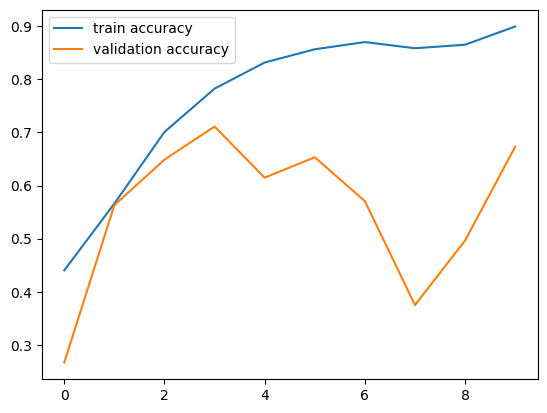

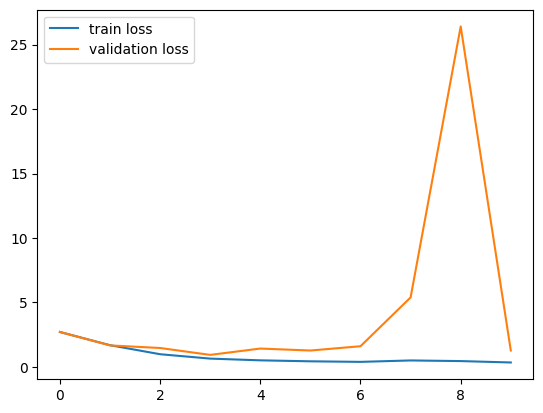

In [ ]:
accuracy_curve()
loss_curve()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test_encoded)

# Print the accuracy
print(f"Test accuracy: {accuracy * 100:.2f}%")

79/79 [==============================] - 5s 59ms/step - loss: 1.2096 - accuracy: 0.6881
Test accuracy: 68.81%


In [ ]:
performance_measure()

79/79 [==============================] - 5s 48ms/step
Accuracy: 0.6881207787048073
Precision: 0.6577738907770126
Recall: 0.6634009298924215
F1 Score: 0.6509692099356811


79/79 [==============================] - 4s 49ms/step


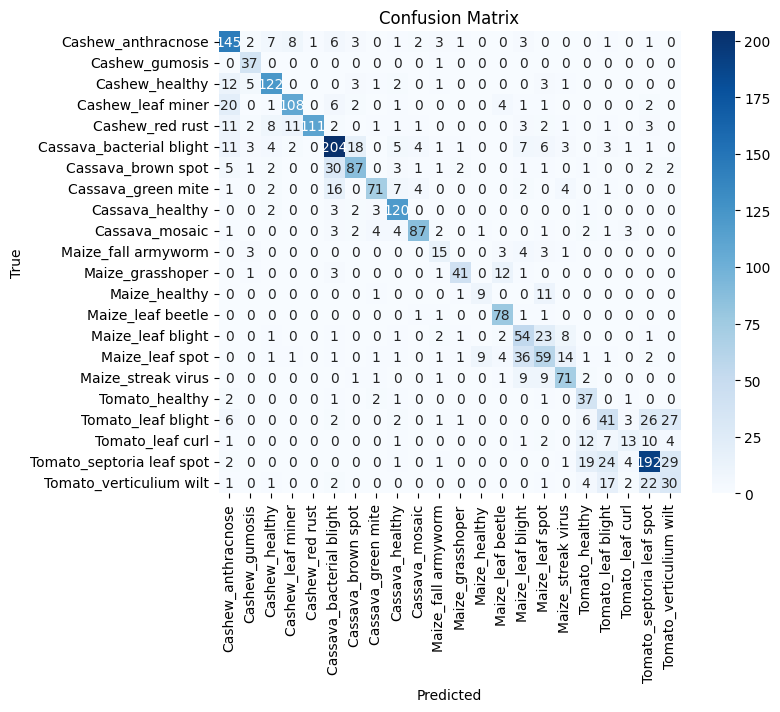

In [ ]:
confusion_matrices()


In [ ]:
file_path = '/content/drive/MyDrive/save model/Resnet50_epoch10_acc68%_.h5'
model.save(file_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


DenseNet121

In [ ]:
from tensorflow.keras.applications import DenseNet121

densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


flat_layer = Flatten()(densenet_model.output)
output_layer = Dense(22, activation='softmax')(flat_layer)

# Create a new model combining VGG16 and the classification layers
model = Model(inputs=densenet_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=10)

Epoch 1/10
638/638 [==============================] - 199s 196ms/step - loss: 3.3234 - accuracy: 0.3376 - val_loss: 3.7733 - val_accuracy: 0.2282
Epoch 2/10
638/638 [==============================] - 120s 188ms/step - loss: 1.8865 - accuracy: 0.4618 - val_loss: 1.3838 - val_accuracy: 0.5728
Epoch 3/10
638/638 [==============================] - 119s 187ms/step - loss: 1.2000 - accuracy: 0.6108 - val_loss: 1.4247 - val_accuracy: 0.5733
Epoch 4/10
638/638 [==============================] - 119s 187ms/step - loss: 0.9636 - accuracy: 0.6749 - val_loss: 788.7471 - val_accuracy: 0.4598
Epoch 5/10
638/638 [==============================] - 119s 187ms/step - loss: 0.7845 - accuracy: 0.7259 - val_loss: 2.6636 - val_accuracy: 0.6734
Epoch 6/10
638/638 [==============================] - 119s 187ms/step - loss: 0.7183 - accuracy: 0.7467 - val_loss: 71.3894 - val_accuracy: 0.2979
Epoch 7/10
638/638 [==============================] - 119s 187ms/step - loss: 0.6494 - accuracy: 0.7721 - val_loss: 0.836

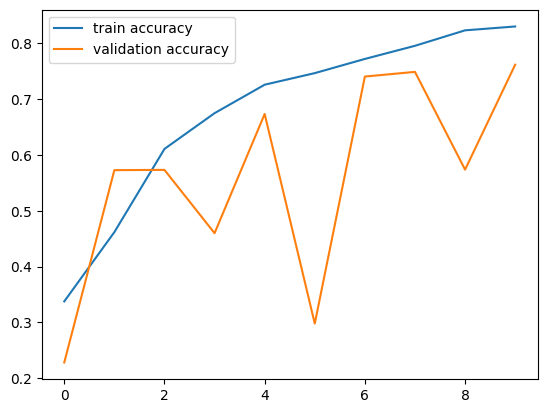

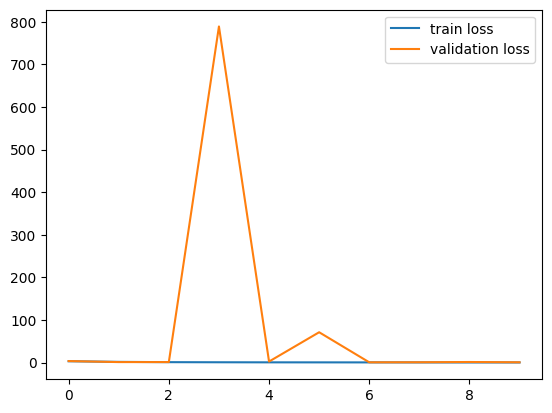

In [ ]:
accuracy_curve()
loss_curve()

In [ ]:
performance_measure()

79/79 [==============================] - 8s 63ms/step
Accuracy: 0.767580452920143
Precision: 0.7587098839591232
Recall: 0.7302735264245764
F1 Score: 0.7367304673534992


79/79 [==============================] - 4s 47ms/step


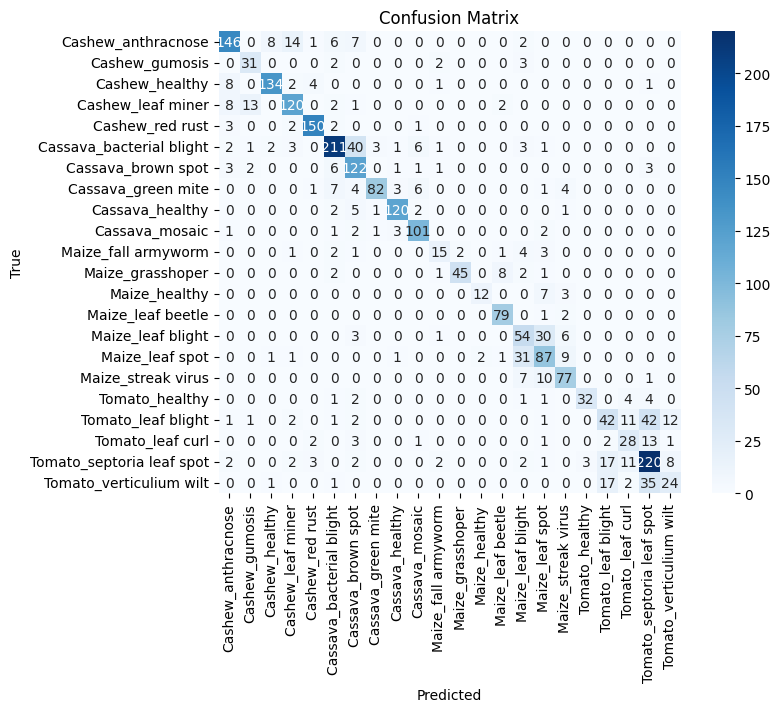

In [ ]:
confusion_matrices()

In [ ]:
file_path = '/content/drive/MyDrive/save model/Densenet121_epoch10_acc76%_.h5'
model.save(file_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Inception v3

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Create the InceptionV3 model without top (fully connected layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add your own classification layers on top of the InceptionV3 model
flat_layer = Flatten()(base_model.output)
output_layer = Dense(22, activation='softmax')(flat_layer)

# Create a new model combining InceptionV3 and the classification layers
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=10)


Epoch 1/10
638/638 [==============================] - 123s 115ms/step - loss: 1.5552 - accuracy: 0.5524 - val_loss: 1.2408 - val_accuracy: 0.6055
Epoch 2/10
638/638 [==============================] - 69s 108ms/step - loss: 0.8771 - accuracy: 0.6993 - val_loss: 770.6383 - val_accuracy: 0.0887
Epoch 3/10
638/638 [==============================] - 68s 107ms/step - loss: 0.7835 - accuracy: 0.7301 - val_loss: 1.6211 - val_accuracy: 0.7021
Epoch 4/10
638/638 [==============================] - 70s 109ms/step - loss: 0.6620 - accuracy: 0.7722 - val_loss: 0.8843 - val_accuracy: 0.7639
Epoch 5/10
638/638 [==============================] - 67s 106ms/step - loss: 0.5893 - accuracy: 0.7947 - val_loss: 3.5104 - val_accuracy: 0.7070
Epoch 6/10
638/638 [==============================] - 68s 106ms/step - loss: 0.5251 - accuracy: 0.8136 - val_loss: 0.6223 - val_accuracy: 0.7767
Epoch 7/10
638/638 [==============================] - 67s 105ms/step - loss: 0.4691 - accuracy: 0.8330 - val_loss: 0.8572 - val

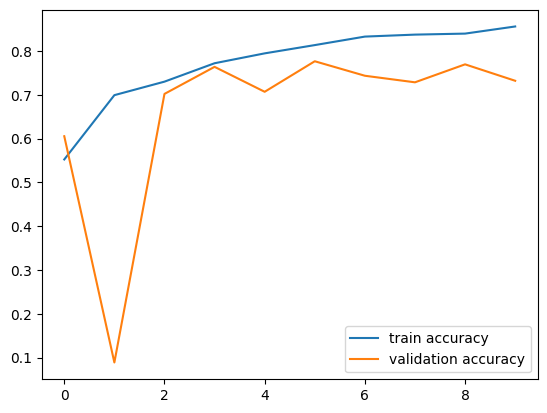

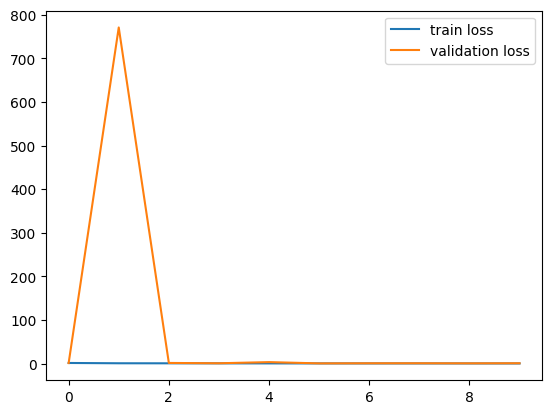

In [ ]:
accuracy_curve()
loss_curve()

In [ ]:
performance_measure()

79/79 [==============================] - 5s 42ms/step
Accuracy: 0.7167262614223282
Precision: 0.7852242924139058
Recall: 0.6590560381131538
F1 Score: 0.6701006494971248


79/79 [==============================] - 2s 27ms/step


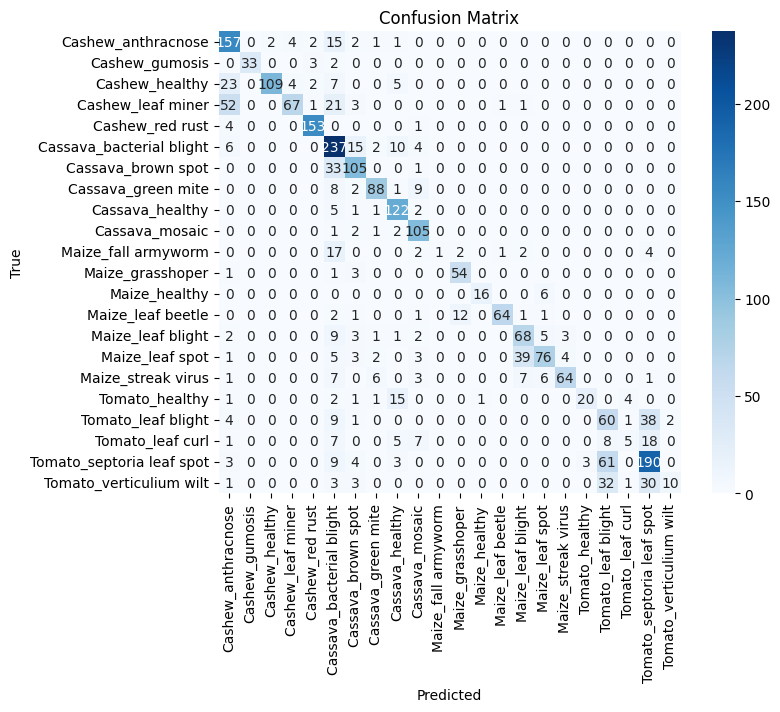

In [ ]:
confusion_matrices()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test_encoded)

# Print the accuracy
print(f"Test accuracy: {accuracy * 100:.2f}%")

79/79 [==============================] - 2s 31ms/step - loss: 0.9826 - accuracy: 0.7167
Test accuracy: 71.67%


In [ ]:
file_path = '/content/drive/MyDrive/save model/inceptionv3_epoch10_acc71%_.h5'
model.save(file_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Xception

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Create the Xception model without top (fully connected layers)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add your own classification layers on top of the Xception model
flat_layer = Flatten()(base_model.output)
output_layer = Dense(22, activation='softmax')(flat_layer)

# Create a new model combining Xception and the classification layers
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=10)


83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/10
638/638 [==============================] - 176s 225ms/step - loss: 0.9954 - accuracy: 0.6746 - val_loss: 0.9778 - val_accuracy: 0.7140
Epoch 2/10
638/638 [==============================] - 141s 221ms/step - loss: 0.5636 - accuracy: 0.8036 - val_loss: 0.6757 - val_accuracy: 0.7718
Epoch 3/10
638/638 [==============================] - 141s 221ms/step - loss: 0.4528 - accuracy: 0.8401 - val_loss: 0.5986 - val_accuracy: 0.8014
Epoch 4/10
638/638 [==============================] - 140s 219ms/step - loss: 0.3669 - accuracy: 0.8705 - val_loss: 0.7586 - val_accuracy: 0.7604
Epoch 5/10
638/638 [==============================] - 141s 221ms/step - loss: 0.3426 - accuracy: 0.8794 - val_loss: 0.5724 - val_accuracy: 0.8235
Epoch 6/10
638/638 [==============================] - 140s 220ms/step - loss: 0.2655 - accuracy: 0.9051 - val_loss: 0.7434 - val_accuracy: 0.7718
Epoch 7/10
638/638 [==============================] - 140s 

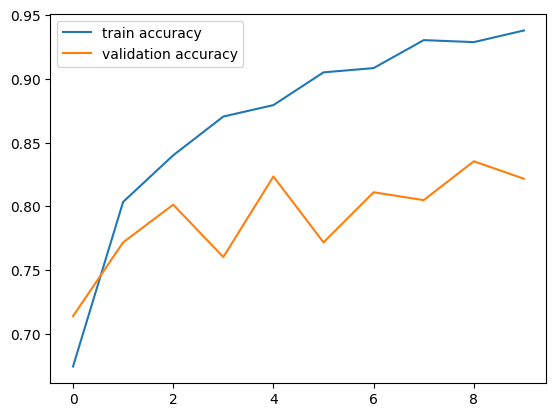

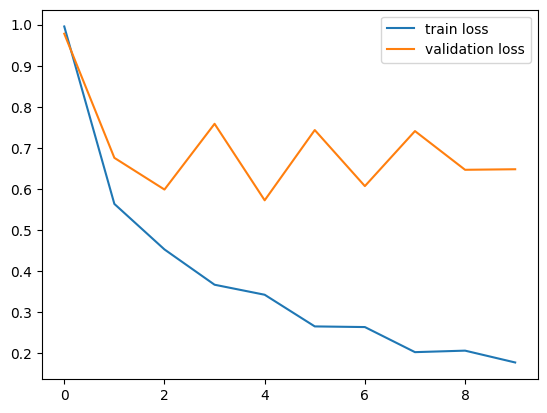

In [ ]:
accuracy_curve()
loss_curve()

In [ ]:
performance_measure()

79/79 [==============================] - 6s 66ms/step
Accuracy: 0.8299562971791815
Precision: 0.833154075796939
Recall: 0.8236447117768392
F1 Score: 0.8152787430245584


79/79 [==============================] - 5s 59ms/step


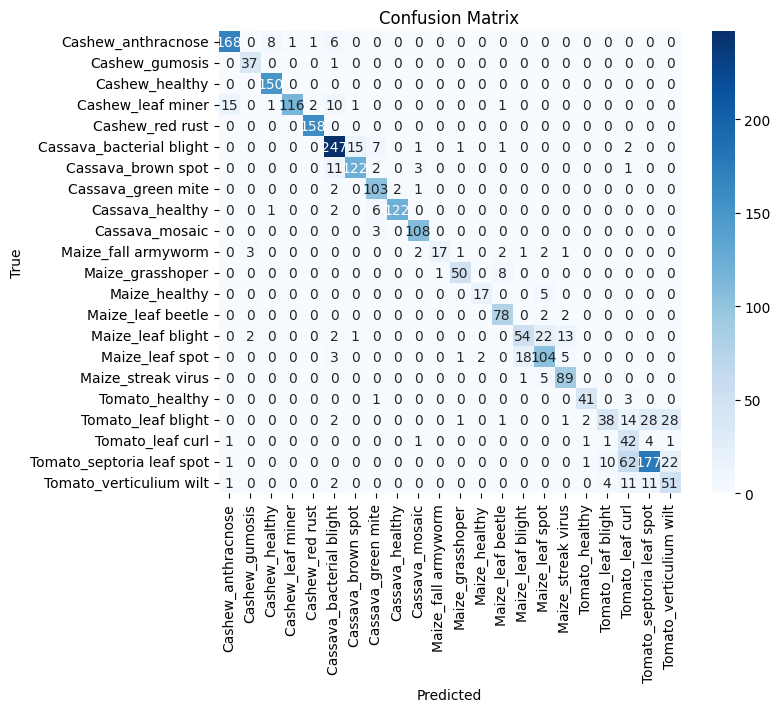

In [ ]:
confusion_matrices()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test_encoded)

# Print the accuracy
print(f"Test accuracy: {accuracy * 100:.2f}%")

79/79 [==============================] - 5s 61ms/step - loss: 0.6014 - accuracy: 0.8300
Test accuracy: 83.00%


In [ ]:
file_path = '/content/drive/MyDrive/save model/xception_epoch10_acc83%_.h5'
model.save(file_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Hybrid model (inception v3 and xception)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3, DenseNet121

# Create base models
inception_model = InceptionV3(weights='imagenet', include_top=False)
densenet_model = DenseNet121(weights='imagenet', include_top=False)

# Freeze the layers of the base models
for layer in inception_model.layers:
    layer.trainable = False
for layer in densenet_model.layers:
    layer.trainable = False

# Create input layer
input_layer = Input(shape=(150, 150, 3))

# Get the output of each base model
inception_output = inception_model(input_layer)
densenet_output = densenet_model(input_layer)

# Add Global Average Pooling layers to reduce spatial dimensions
inception_output = GlobalAveragePooling2D()(inception_output)
densenet_output = GlobalAveragePooling2D()(densenet_output)

# Concatenate the outputs of the two base models
merged_output = Concatenate()([inception_output, densenet_output])

# Add additional layers for classification (customize this part as needed)
x = Dense(256, activation='relu')(merged_output)
output_layer = Dense(22, activation='softmax')(x)  # num_classes is the number of classes in your classification task

# Create the hybrid model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model (customize the optimizer, loss, and metrics as needed)
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
hybrid_model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 inception_v3 (Functional)   (None, None, None, 2048)     2180278   ['input_8[0][0]']             
                                                          4                                       
                                                                                                  
 densenet121 (Functional)    (None, None, None, 1024)     7037504   ['input_8[0][0]']             
                                                                                                  
 global_average_pooling2d_2  (None, 2048)                 0         ['inception_v3[0][0]']  

In [ ]:
history = hybrid_model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=10)

Epoch 1/10
638/638 [==============================] - 77s 100ms/step - loss: 5.0135 - accuracy: 0.0981 - val_loss: 2.8175 - val_accuracy: 0.1139
Epoch 2/10
638/638 [==============================] - 54s 85ms/step - loss: 2.7694 - accuracy: 0.1687 - val_loss: 2.7007 - val_accuracy: 0.1981
Epoch 3/10
638/638 [==============================] - 54s 84ms/step - loss: 2.6532 - accuracy: 0.1864 - val_loss: 2.5978 - val_accuracy: 0.2008
Epoch 4/10
638/638 [==============================] - 54s 85ms/step - loss: 2.6069 - accuracy: 0.1879 - val_loss: 2.5426 - val_accuracy: 0.2026
Epoch 5/10
638/638 [==============================] - 54s 85ms/step - loss: 2.5671 - accuracy: 0.1923 - val_loss: 2.5694 - val_accuracy: 0.1999
Epoch 6/10
638/638 [==============================] - 54s 84ms/step - loss: 2.5437 - accuracy: 0.1934 - val_loss: 2.4917 - val_accuracy: 0.2114
Epoch 7/10
638/638 [==============================] - 54s 85ms/step - loss: 2.5430 - accuracy: 0.1953 - val_loss: 2.4745 - val_accuracy

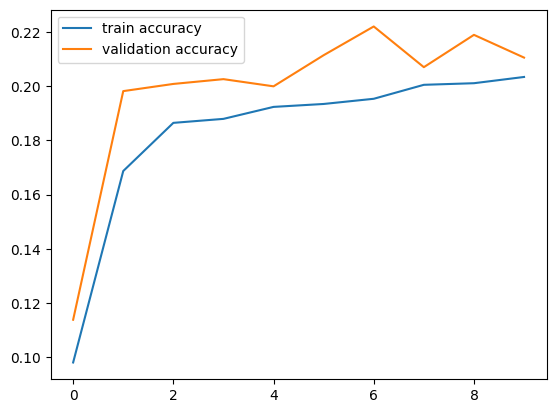

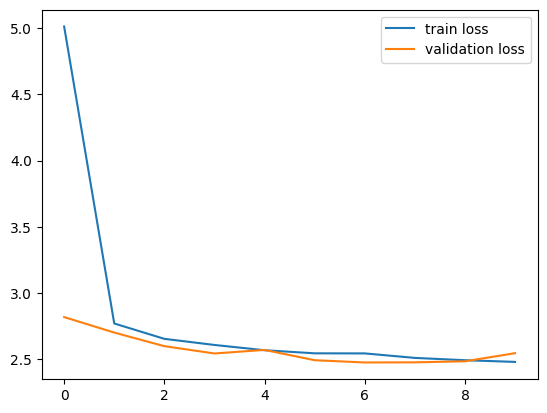

79/79 [==============================] - 4s 56ms/step
Accuracy: 0.8299562971791815
Precision: 0.833154075796939
Recall: 0.8236447117768392
F1 Score: 0.8152787430245584
79/79 [==============================] - 4s 56ms/step


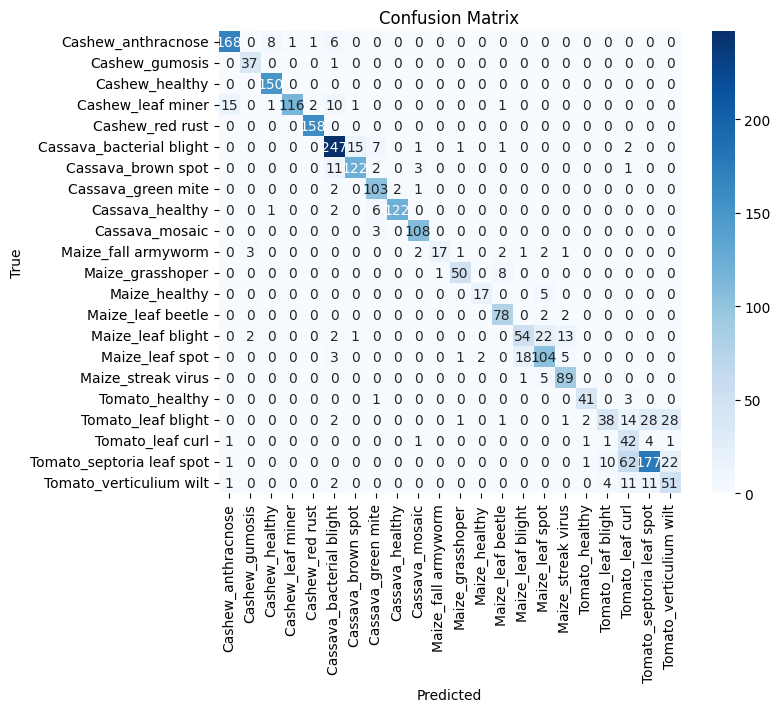

In [ ]:
output_checking()

In [ ]:
file_path = '/content/drive/MyDrive/save model/hybrid(inceptionv3 and xception)_epoch10_acc83%_.h5'
model.save(file_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


VGG19

In [ ]:
from tensorflow.keras.applications import VGG16



# Load the VGG16 model with pre-trained weights
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Define classes and subclasses as before
# ...

# Load your data and labels
# ...


# # Preprocess the images to match VGG16 input requirements
# x_train_preprocessed = np.array([cv2.resize(image, (224, 224)) for image in x_train])
# x_val_preprocessed = np.array([cv2.resize(image, (224, 224)) for image in x_val])

# Preprocess labels
# y_train_categorical = to_categorical(y_train)
# y_val_categorical = to_categorical(y_val)

# Add classification layers on top of VGG16
flat_layer = Flatten()(vgg_model.output)
output_layer = Dense(22, activation='softmax')(flat_layer)

# Create a new model combining VGG16 and the classification layers
model = Model(inputs=vgg_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=10)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
638/638 [==============================] - 147s 213ms/step - loss: 3.1989 - accuracy: 0.0993 - val_loss: 2.9927 - val_accuracy: 0.1090
Epoch 2/10
638/638 [==============================] - 128s 200ms/step - loss: 2.9715 - accuracy: 0.1027 - val_loss: 2.9519 - val_accuracy: 0.1090
Epoch 3/10
638/638 [==============================] - 128s 201ms/step - loss: 2.9477 - accuracy: 0.1064 - val_loss: 2.9389 - val_accuracy: 0.1139
Epoch 4/10
638/638 [==============================] - 129s 201ms/step - loss: 2.9404 - accuracy: 0.1085 - val_loss: 2.9349 - val_accuracy: 0.1139
Epoch 5/10
638/638 [==============================] - 128s 200ms/step - loss: 2.9380 - accuracy: 0.1085 - val_loss: 2.9338 - val_accuracy: 0.1139
Epoch 6/10
638/638 [==============================] - 128s 200ms/step - loss: 2.9371 - accuracy: 0.1085 - val_loss: 2.9333 - val_accuracy: 0.1139
Epoch 7/10
638/638 [==============================] - 128s 

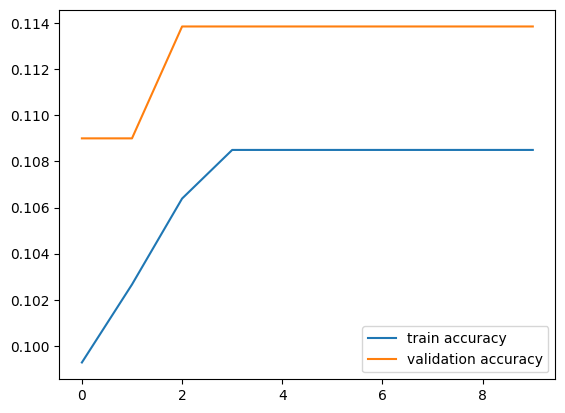

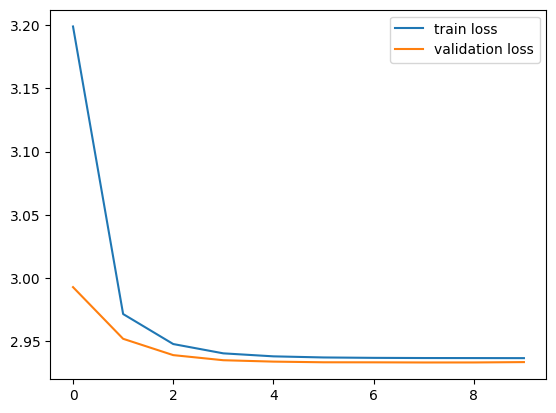

79/79 [==============================] - 7s 82ms/step
Accuracy: 0.10846245530393325
Precision: 0.004930111604724239
Recall: 0.045454545454545456
F1 Score: 0.008895405669599217


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 5s 60ms/step


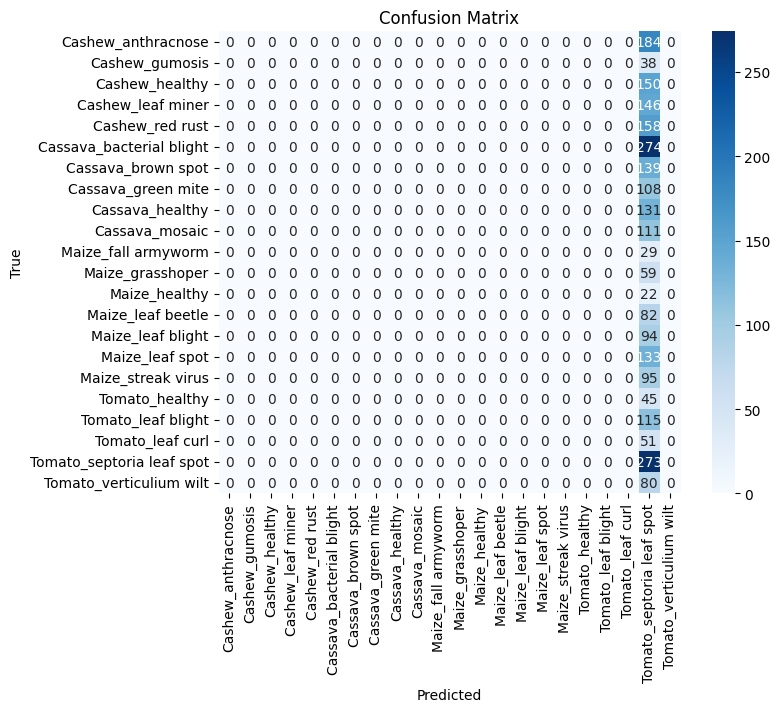

In [ ]:
output_checking()

Mobile_net


In [ ]:
from tensorflow.keras.applications import MobileNet

# Load the MobileNet model with pre-trained weights
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Define classes and subclasses as before
# ...

# Load your data and labels
# ...

# # Preprocess the images to match MobileNet input requirements (resize to 224x224)
# x_train_preprocessed = np.array([cv2.resize(image, (224, 224)) for image in x_train])
# x_val_preprocessed = np.array([cv2.resize(image, (224, 224)) for image in x_val])

# Preprocess labels
# y_train_categorical = to_categorical(y_train)
# y_val_categorical = to_categorical(y_val)

# Add classification layers on top of MobileNet
flat_layer = Flatten()(mobilenet_model.output)
output_layer = Dense(22, activation='softmax')(flat_layer)

# Create a new model combining MobileNet and the classification layers
model = Model(inputs=mobilenet_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=10)


17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/10
638/638 [==============================] - 64s 59ms/step - loss: 1.7202 - accuracy: 0.6268 - val_loss: 0.8382 - val_accuracy: 0.7317
Epoch 2/10
638/638 [==============================] - 36s 57ms/step - loss: 0.7106 - accuracy: 0.7611 - val_loss: 0.9049 - val_accuracy: 0.7180
Epoch 3/10
638/638 [==============================] - 36s 57ms/step - loss: 0.6775 - accuracy: 0.7727 - val_loss: 0.6604 - val_accuracy: 0.7652
Epoch 4/10
638/638 [==============================] - 37s 58ms/step - loss: 0.4762 - accuracy: 0.8328 - val_loss: 0.5469 - val_accuracy: 0.7952
Epoch 5/10
638/638 [==============================] - 37s 58ms/step - loss: 0.4228 - accuracy: 0.8476 - val_loss: 0.8105 - val_accuracy: 0.7670
Epoch 6/10
638/638 [==============================] - 37s 58ms/step - loss: 0.4910 - accuracy: 0.8291 - val_loss: 0.5564 - val_accuracy: 0.8054
Epoch 7/10
638/638 [==============================] - 37s 58ms/step - l

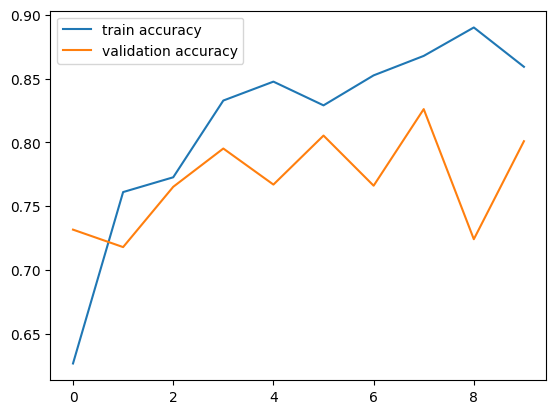

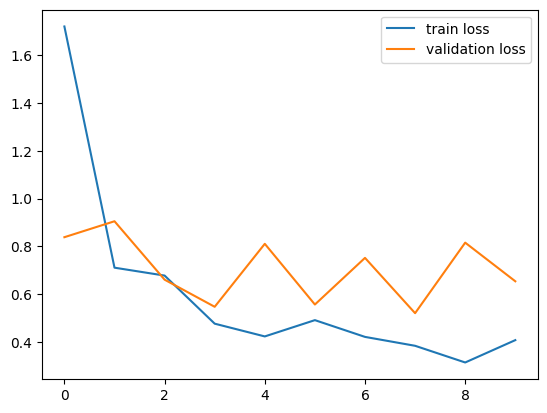

79/79 [==============================] - 3s 26ms/step
Accuracy: 0.8061183949145808
Precision: 0.780705017304389
Recall: 0.7935201001689844
F1 Score: 0.777540185469913
79/79 [==============================] - 1s 15ms/step


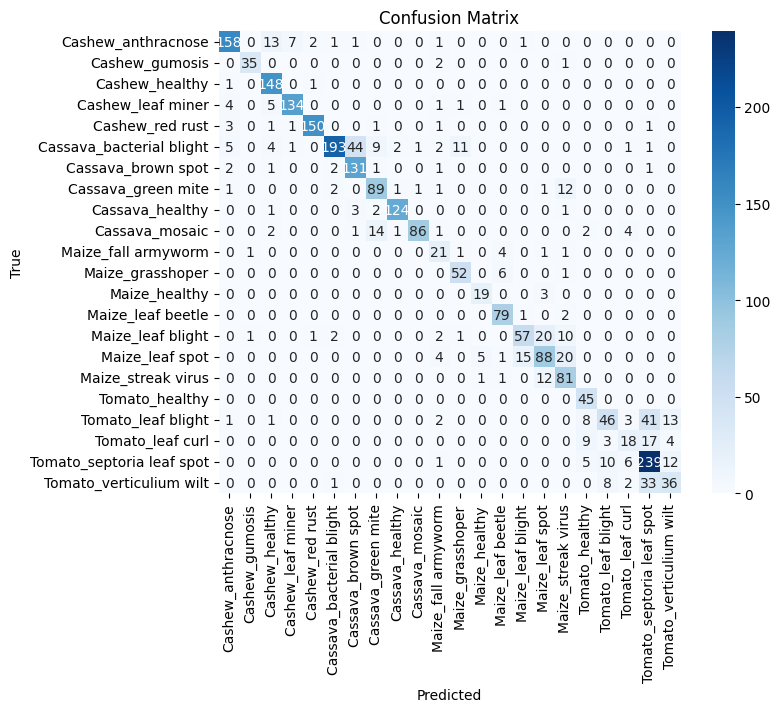

In [ ]:
output_checking()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, DenseNet121, MobileNet

# Load pre-trained models
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
densenet121_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the pre-trained models
for model in [vgg16_model, vgg19_model, resnet50_model, densenet121_model, mobilenet_model]:
    for layer in model.layers:
        layer.trainable = False

# Create an input layer for your data
input_layer = Input(shape=(150, 150, 3))

# Get the outputs of each pre-trained model
vgg16_output = vgg16_model(input_layer)
vgg19_output = vgg19_model(input_layer)
resnet50_output = resnet50_model(input_layer)
densenet121_output = densenet121_model(input_layer)
mobilenet_output = mobilenet_model(input_layer)

# Add Global Average Pooling layers to reduce spatial dimensions
vgg16_output = GlobalAveragePooling2D()(vgg16_output)
vgg19_output = GlobalAveragePooling2D()(vgg19_output)
resnet50_output = GlobalAveragePooling2D()(resnet50_output)
densenet121_output = GlobalAveragePooling2D()(densenet121_output)
mobilenet_output = GlobalAveragePooling2D()(mobilenet_output)

# Concatenate the outputs of all models
merged_output = Concatenate()([vgg16_output, vgg19_output, resnet50_output, densenet121_output, mobilenet_output])

# Add custom classification layers on top
x = Dense(256, activation='relu')(merged_output)
output_layer = Dense(22, activation='softmax')(x)  # num_classes is the number of classes in your task

# Create the hybrid model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with an appropriate optimizer, loss, and metrics
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
hybrid_model.summary()


29084464/29084464 [==============================] - 0s 0us/step


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, 4, 4, 512)            1471468   ['input_7[0][0]']             
                                                          8                                       
                                                                                                  
 vgg19 (Functional)          (None, 4, 4, 512)            2002438   ['input_7[0][0]']             
                                                          4                                       
                                                                                            

In [ ]:
history = hybrid_model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=10)

Epoch 1/10
638/638 [==============================] - 231s 335ms/step - loss: 1.0468 - accuracy: 0.6961 - val_loss: 0.6568 - val_accuracy: 0.7745
Epoch 2/10
638/638 [==============================] - 188s 295ms/step - loss: 0.5076 - accuracy: 0.8141 - val_loss: 0.5200 - val_accuracy: 0.8005
Epoch 3/10
638/638 [==============================] - 188s 294ms/step - loss: 0.4006 - accuracy: 0.8491 - val_loss: 0.5721 - val_accuracy: 0.8019
Epoch 4/10
638/638 [==============================] - 187s 294ms/step - loss: 0.3385 - accuracy: 0.8697 - val_loss: 0.5789 - val_accuracy: 0.8054
Epoch 5/10
638/638 [==============================] - 188s 294ms/step - loss: 0.3010 - accuracy: 0.8847 - val_loss: 0.5764 - val_accuracy: 0.8199
Epoch 6/10
638/638 [==============================] - 187s 293ms/step - loss: 0.2680 - accuracy: 0.8983 - val_loss: 0.6523 - val_accuracy: 0.8063
Epoch 7/10
638/638 [==============================] - 187s 293ms/step - loss: 0.2325 - accuracy: 0.9120 - val_loss: 0.6018 -

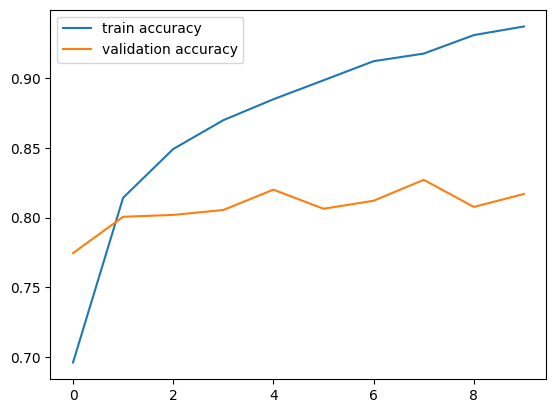

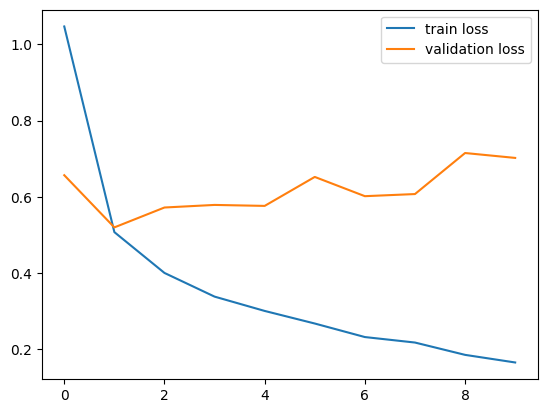

79/79 [==============================] - 25s 249ms/step
Accuracy: 0.8077075883988876
Precision: 0.8161316141522558
Recall: 0.8055971858634102
F1 Score: 0.8012634883970257
79/79 [==============================] - 20s 261ms/step


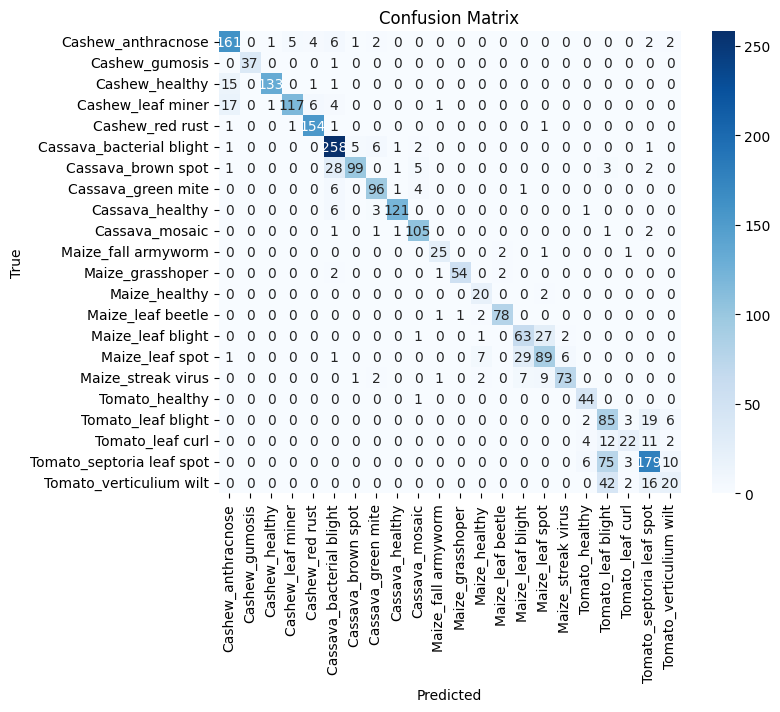

In [ ]:
model = hybrid_model
output_checking()

In [ ]:
file_path = '/content/drive/MyDrive/save model/hybrid5model_epoch10_acc80%_.h5'
model.save(file_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


AlexNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Define the AlexNet architecture
def alexnet(input_shape=(150, 150, 3), num_classes=22):
    model = tf.keras.Sequential([
        Conv2D(96, (11, 11),  activation='relu', input_shape=input_shape),
        MaxPooling2D((3, 3), strides=(2, 2)),
        Conv2D(256, (5, 5), activation='relu'),
        MaxPooling2D((3, 3), strides=(2, 2)),
        Conv2D(384, (3, 3), activation='relu'),
        Conv2D(384, (3, 3), activation='relu'),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((3, 3), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Create an instance of the AlexNet model
alexnet_model = alexnet(input_shape=(150, 150, 3), num_classes=22)

# Compile the model
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with your data
history = alexnet_model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=10)


Epoch 1/10
  2/638 [..............................] - ETA: 5:20:14 - loss: 2559.2974 - accuracy: 0.0312  

KeyboardInterrupt: ignored

Squeezenet (SN)

In [13]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Create the DenseNet-201 model without top (fully connected layers)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add your own classification layers on top of the DenseNet-201 model
flat_layer = Flatten()(base_model.output)
output_layer = Dense(22, activation='softmax')(flat_layer)  # Replace '22' with the number of your output classes

# Create a new model combining DenseNet-201 and the classification layers
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (you need to provide your training data here)
history = model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=10)


74836368/74836368 [==============================] - 0s 0us/step
Epoch 1/10
638/638 [==============================] - 322s 293ms/step - loss: 3.5136 - accuracy: 0.2955 - val_loss: 16.9043 - val_accuracy: 0.3782
Epoch 2/10
638/638 [==============================] - 183s 287ms/step - loss: 1.6981 - accuracy: 0.4921 - val_loss: 4.4465 - val_accuracy: 0.5300
Epoch 3/10
638/638 [==============================] - 183s 287ms/step - loss: 1.3172 - accuracy: 0.5786 - val_loss: 1.9353 - val_accuracy: 0.4850
Epoch 4/10
638/638 [==============================] - 179s 281ms/step - loss: 1.0527 - accuracy: 0.6460 - val_loss: 2.1428 - val_accuracy: 0.5018
Epoch 5/10
638/638 [==============================] - 178s 279ms/step - loss: 1.0010 - accuracy: 0.6633 - val_loss: 375.0754 - val_accuracy: 0.5861
Epoch 6/10
638/638 [==============================] - 184s 288ms/step - loss: 0.8061 - accuracy: 0.7220 - val_loss: 15.5863 - val_accuracy: 0.6695
Epoch 7/10
638/638 [==============================] - 1

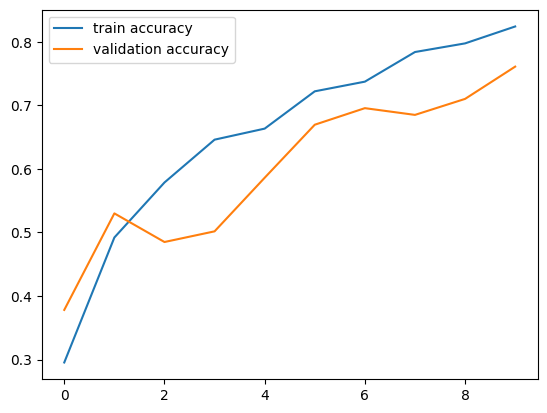

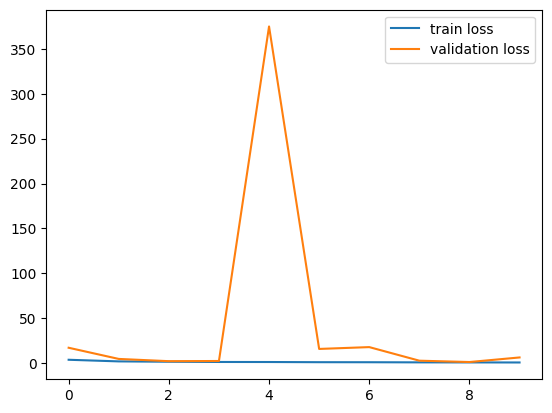

79/79 [==============================] - 6s 71ms/step
Accuracy: 0.742947953913389
Precision: 0.742432418063208
Recall: 0.6731684825243843
F1 Score: 0.6849690469899546
79/79 [==============================] - 6s 72ms/step


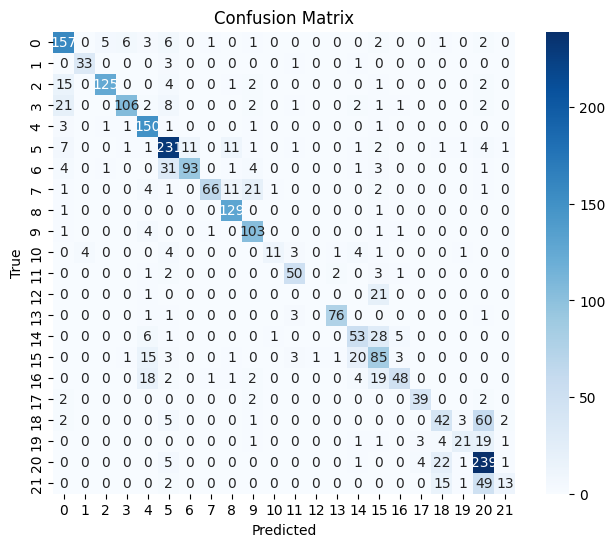

In [16]:
output_checking()

Mobilenetv2

In [11]:
from tensorflow.keras.applications import MobileNetV2

# Load the MobileNet model with pre-trained weights
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Define classes and subclasses as before
# ...

# Load your data and labels
# ...

# # Preprocess the images to match MobileNet input requirements (resize to 224x224)
# x_train_preprocessed = np.array([cv2.resize(image, (224, 224)) for image in x_train])
# x_val_preprocessed = np.array([cv2.resize(image, (224, 224)) for image in x_val])

# Preprocess labels
# y_train_categorical = to_categorical(y_train)
# y_val_categorical = to_categorical(y_val)

# Add classification layers on top of MobileNet
flat_layer = Flatten()(mobilenet_model.output)
output_layer = Dense(22, activation='softmax')(flat_layer)

# Create a new model combining MobileNet and the classification layers
model = Model(inputs=mobilenet_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=10)


Epoch 1/10
638/638 [==============================] - 91s 75ms/step - loss: 2.0551 - accuracy: 0.5089 - val_loss: 17.2018 - val_accuracy: 0.0834
Epoch 2/10
638/638 [==============================] - 45s 70ms/step - loss: 0.8831 - accuracy: 0.7028 - val_loss: 5.7475 - val_accuracy: 0.3844
Epoch 3/10
638/638 [==============================] - 45s 71ms/step - loss: 0.8224 - accuracy: 0.7284 - val_loss: 13.2417 - val_accuracy: 0.3398
Epoch 4/10
638/638 [==============================] - 45s 71ms/step - loss: 0.6464 - accuracy: 0.7780 - val_loss: 4.6084 - val_accuracy: 0.3756
Epoch 5/10
638/638 [==============================] - 45s 71ms/step - loss: 1.1005 - accuracy: 0.6579 - val_loss: 7.5299 - val_accuracy: 0.2264
Epoch 6/10
638/638 [==============================] - 44s 69ms/step - loss: 0.7368 - accuracy: 0.7408 - val_loss: 3.4495 - val_accuracy: 0.4391
Epoch 7/10
638/638 [==============================] - 46s 71ms/step - loss: 0.5252 - accuracy: 0.8113 - val_loss: 1.5379 - val_accurac

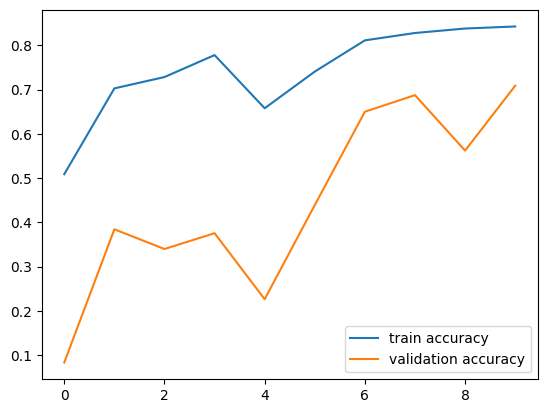

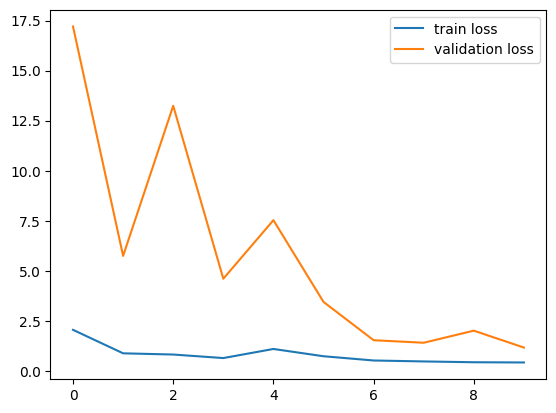

79/79 [==============================] - 3s 27ms/step
Accuracy: 0.6881207787048073
Precision: 0.7442298322992152
Recall: 0.6475384283834265
F1 Score: 0.663789041503401
79/79 [==============================] - 2s 20ms/step


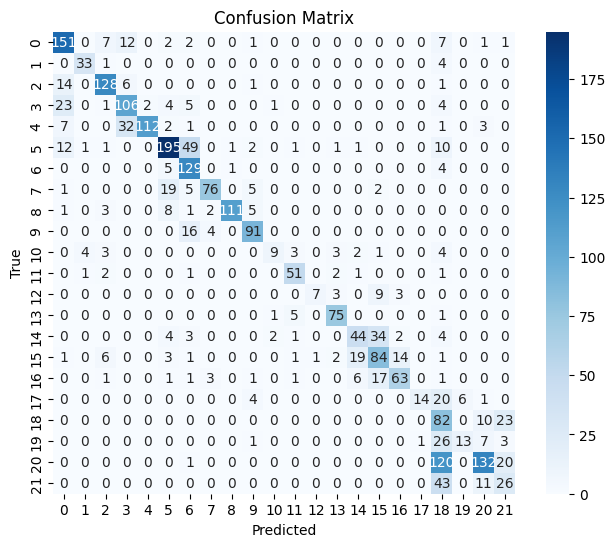

In [13]:
output_checking()

Restnet101

In [ ]:
from tensorflow.keras.applications import ResNet101

# Load the MobileNet model with pre-trained weights
mobilenet_model = ResNet101(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Define classes and subclasses as before
# ...

# Load your data and labels
# ...

# # Preprocess the images to match MobileNet input requirements (resize to 224x224)
# x_train_preprocessed = np.array([cv2.resize(image, (224, 224)) for image in x_train])
# x_val_preprocessed = np.array([cv2.resize(image, (224, 224)) for image in x_val])

# Preprocess labels
# y_train_categorical = to_categorical(y_train)
# y_val_categorical = to_categorical(y_val)

# Add classification layers on top of MobileNet
flat_layer = Flatten()(mobilenet_model.output)
output_layer = Dense(22, activation='softmax')(flat_layer)

# Create a new model combining MobileNet and the classification layers
model = Model(inputs=mobilenet_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=10,verbose=1)


171446536/171446536 [==============================] - 1s 0us/step
Epoch 1/10
638/638 [==============================] - 276s 317ms/step - loss: 1.9825 - accuracy: 0.4636 - val_loss: 3.3599 - val_accuracy: 0.4109
Epoch 2/10
638/638 [==============================] - 198s 311ms/step - loss: 0.9582 - accuracy: 0.6723 - val_loss: 1.3865 - val_accuracy: 0.5459
Epoch 3/10
638/638 [==============================] - 194s 304ms/step - loss: 0.7534 - accuracy: 0.7378 - val_loss: 1.0530 - val_accuracy: 0.6862
Epoch 4/10
638/638 [==============================] - 194s 305ms/step - loss: 0.6213 - accuracy: 0.7805 - val_loss: 1.4759 - val_accuracy: 0.5905
Epoch 5/10
638/638 [==============================] - 194s 305ms/step - loss: 0.5245 - accuracy: 0.8126 - val_loss: 3.1207 - val_accuracy: 0.3310
Epoch 6/10
638/638 [==============================] - 194s 304ms/step - loss: 0.4715 - accuracy: 0.8299 - val_loss: 1.4528 - val_accuracy: 0.5838
Epoch 7/10
638/638 [==============================] - 198